In [1]:
import sympy as sp
from sympy.physics.vector import init_vprinting
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

import csv

import pandas as pd

from sympy.physics.mechanics import dynamicsymbols

DH = pd.read_excel("DH-Parameters.xlsx", 
                   dtype = {"theta (deg)": float,
                            "alpha (deg)":float,
                            "r (mm)": float,
                            "d (mm)": float})

theta_dic = DH["theta (deg)"]
alpha_dic = DH["alpha (deg)"]
r_dic = DH["r (mm)"]
d_dic = DH["d (mm)"]

d2r = np.deg2rad

Initialize printing so that all of the mathematical expressions can be rendered in standard mathematical notation.

In [2]:
init_vprinting(use_latex='mathjax', pretty_print=False)

In [3]:
theta, alpha, r, d = dynamicsymbols('theta alpha r d')

theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11, theta12, theta13 = dynamicsymbols('theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11, theta12, theta13')

alpha1 = d2r(alpha_dic[0])
alpha2 = d2r(alpha_dic[1])
alpha3 = d2r(alpha_dic[2])
alpha4 = d2r(alpha_dic[3])
alpha5 = d2r(alpha_dic[4])
alpha6 = d2r(alpha_dic[5])
alpha7 = d2r(alpha_dic[6])
alpha8 = d2r(alpha_dic[7])
alpha9 = d2r(alpha_dic[8])
alpha10 = d2r(alpha_dic[9])
alpha11 = d2r(alpha_dic[10])
alpha12 = d2r(alpha_dic[11])
alpha13 = d2r(alpha_dic[12])

r1 = r_dic[0]
r2 = r_dic[1]
r3 = r_dic[2]
r4 = r_dic[3]
r5 = r_dic[4]
r6 = r_dic[5]
r7 = r_dic[6]
r8 = r_dic[7]
r9 = r_dic[8]
r10 = r_dic[9]
r11 = r_dic[10]
r12 = r_dic[11]
r13 = r_dic[12]

d1 = d_dic[0]
d2 = d_dic[1]
d3 = d_dic[2]
d4 = d_dic[3]
d5 = d_dic[4]
d6 = d_dic[5]
d7 = d_dic[6]
d8 = d_dic[7]
d9 = d_dic[8]
d10 = d_dic[9]
d11 = d_dic[10]
d12 = d_dic[11]
d13 = d_dic[12]

# FIXED Angles
theta6s = d2r(theta_dic[5])
theta8s = d2r(theta_dic[7])

# VARIABLE Angles
theta1s = d2r(theta_dic[0])                # Hip 1
theta2s = d2r(theta_dic[1])                # Hip 2
theta3s = d2r(theta_dic[2])                # Thigh
theta4s = d2r(theta_dic[3])                # Foreleg
theta5s = d2r(theta_dic[4])                # Knee
theta7s = d2r(theta_dic[6])                # Feet
theta9s = d2r(theta_dic[8])
theta10s = d2r(theta_dic[9])
theta11s = d2r(theta_dic[10])
theta12s = d2r(theta_dic[11])
theta13s = d2r(theta_dic[12])

xs = [0]
ys = [0]
zs = [0]

The standard homogeneous transformation matrix is as followed:

In [4]:
rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([r*sp.cos(theta), r*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), r*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), r*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

Transformation matrices:

In [5]:
m01 = m.subs({alpha:alpha1, r:r1, theta:theta1, d:d1})

m12 = m.subs({alpha:alpha2, r:r2, theta:theta2, d:d2})

m23 = m.subs({alpha:alpha3, r:r3, theta:theta3, d:d3})

m34 = m.subs({alpha:alpha4, r:r4, theta:theta4, d:d4})

m45 = m.subs({alpha:alpha5, r:r5, theta:theta5, d:d5})

m56 = m.subs({alpha:alpha6, r:r6, theta:theta6, d:d6})

m67 = m.subs({alpha:alpha7, r:r7, theta:theta7, d:d7})

Transformation from 0 to 1:

In [6]:
m01 = m01

px = m01[0,3]
py = m01[1,3]
pz = m01[2,3]

# Lambdify the sympy expression into numpy function:
fx = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), px, 'numpy')
fy = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), py, 'numpy')
fz = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), pz, 'numpy')

# Tip position in relative to frame 0

x = fx(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
y = fy(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
z = fz(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)

xs.append(x)
ys.append(y)
zs.append(z)

x, y, z

(0, 0, 47.49)

Transformation from 0 to 2:

In [7]:
m02 = m01*m12

px = m02[0,3]
py = m02[1,3]
pz = m02[2,3]

# Lambdify the sympy expression into numpy function:
fx = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), px, 'numpy')
fy = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), py, 'numpy')
fz = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), pz, 'numpy')


# Tip position in relative to frame 0

x = fx(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
y = fy(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
z = fz(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)

xs.append(x)
ys.append(y)
zs.append(z)

x, y, z

(0.0, -43.0, 47.49)

Transformation from 0 to 3:

In [8]:
m03 = m01*m12*m23

px = m03[0,3]
py = m03[1,3]
pz = m03[2,3]

# Lambdify the sympy expression into numpy function:
fx = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), px, 'numpy')
fy = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), py, 'numpy')
fz = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), pz, 'numpy')

# Tip position in relative to frame 0

x = fx(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
y = fy(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
z = fz(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)

xs.append(x)
ys.append(y)
zs.append(z)

x, y, z

(6.459685625292875e-15, -116.18549985824878, 15.180827765195403)

Transformation from 0 to 4:

In [9]:
m04 = m01*m12*m23*m34

px = m04[0,3]
py = m04[1,3]
pz = m04[2,3]

# Lambdify the sympy expression into numpy function:
fx = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), px, 'numpy')
fy = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), py, 'numpy')
fz = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), pz, 'numpy')

# Tip position in relative to frame 0

x = fx(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
y = fy(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
z = fz(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)

xs.append(x)
ys.append(y)
zs.append(z)

x, y, z

(3.506784246490693e-15, -239.64105959147105, 186.86092670201683)

Transformation from 0 to 5:

In [10]:
m05 = m01*m12*m23*m34*m45

px = m05[0,3]
py = m05[1,3]
pz = m05[2,3]

# Lambdify the sympy expression into numpy function:
fx = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), px, 'numpy')
fy = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), py, 'numpy')
fz = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), pz, 'numpy')

# Tip position in relative to frame 0

x = fx(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
y = fy(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
z = fz(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)

xs.append(x)
ys.append(y)
zs.append(z)

x, y, z

(9.308483964787518e-15, -310.07045266537574, 162.54137302104994)

Transformation from 0 to 6:

In [11]:
m06 = m01*m12*m23*m34*m45*m56

px = m06[0,3]
py = m06[1,3]
pz = m06[2,3]

# Lambdify the sympy expression into numpy function:
fx = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), px, 'numpy')
fy = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), py, 'numpy')
fz = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), pz, 'numpy')

# Tip position in relative to frame 0

x = fx(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
y = fy(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
z = fz(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)

xs.append(x)
ys.append(y)
zs.append(z)

x, y, z

(2.1369585140972795e-14, -416.20409780396454, 71.70228798825093)

Transformation from 0 to 7:

In [12]:
m07 = m01*m12*m23*m34*m45*m56*m67

px = m07[0,3]
py = m07[1,3]
pz = m07[2,3]

# Lambdify the sympy expression into numpy function:
fx = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), px, 'numpy')
fy = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), py, 'numpy')
fz = sp.lambdify((theta1, theta2, theta3, theta4, theta5, theta6, theta7), pz, 'numpy')

# Tip position in relative to frame 0

x = fx(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
y = fy(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)
z = fz(theta1s, theta2s, theta3s, theta4s, theta5s, theta6s, theta7s)

xs.append(x)
ys.append(y)
zs.append(z)

x, y, z

(2.5512248624991797e-14, -441.2075204763213, 29.050881743351113)

Plot Leg configuration in interactive 3D:

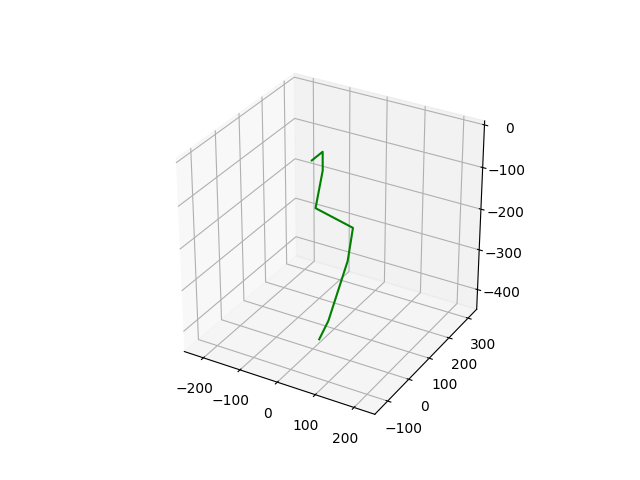

In [13]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   

plt.close()
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)


# Fake bounding box to equalize aspect ratio
# ---------------------------------------------------------------------------------------------------- #

max_range = np.array([xs.max()-xs.min(), ys.max()-ys.min(), zs.max()-zs.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xs.max()+xs.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ys.max()+ys.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zs.max()+zs.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
   ax.plot([xb], [zb], [yb], 'w')

# ---------------------------------------------------------------------------------------------------- #
 
# plotting
ax.plot3D(xs, zs, ys, 'green')
ax.set_title('')

plt.grid()
plt.show()